In [1]:
from glob import glob

In [2]:
train_raw_O_list = glob('./data/OX/test_raw/O/*')

In [3]:
train_raw_O_list

['./data/OX/test_raw/O/o5.png',
 './data/OX/test_raw/O/IMG_1134.JPG',
 './data/OX/test_raw/O/IMG_1145.JPG',
 './data/OX/test_raw/O/o38.png',
 './data/OX/test_raw/O/IMG_1138.JPG',
 './data/OX/test_raw/O/IMG_1171.JPG',
 './data/OX/test_raw/O/IMG_1136.JPG',
 './data/OX/test_raw/O/o43.png',
 './data/OX/test_raw/O/IMG_1170.JPG',
 './data/OX/test_raw/O/o2.png',
 './data/OX/test_raw/O/IMG_1172.JPG',
 './data/OX/test_raw/O/o36.png',
 './data/OX/test_raw/O/PNG á\x84\x8bá\x85µá\x84\x86á\x85µá\x84\x8cá\x85µ(38).png',
 './data/OX/test_raw/O/PNG á\x84\x8bá\x85µá\x84\x86á\x85µá\x84\x8cá\x85µ(24).png',
 './data/OX/test_raw/O/o27.png',
 './data/OX/test_raw/O/PNG á\x84\x8bá\x85µá\x84\x86á\x85µá\x84\x8cá\x85µ(40).png',
 './data/OX/test_raw/O/PNG á\x84\x8bá\x85µá\x84\x86á\x85µá\x84\x8cá\x85µ(23).png',
 './data/OX/test_raw/O/IMG_1137.JPG',
 './data/OX/test_raw/O/o34.png',
 './data/OX/test_raw/O/o39.png',
 './data/OX/test_raw/O/IMG_1139.JPG',
 './data/OX/test_raw/O/PNG á\x84\x8bá\x85µá\x84\x86á\x85µá\x84\x

In [4]:
## 이번에는 opencv가 아닌 skimage를 통해 진행!!

from skimage.transform import rescale, resize
from skimage import color
from skimage.io import imread, imsave
import matplotlib.pyplot as plt

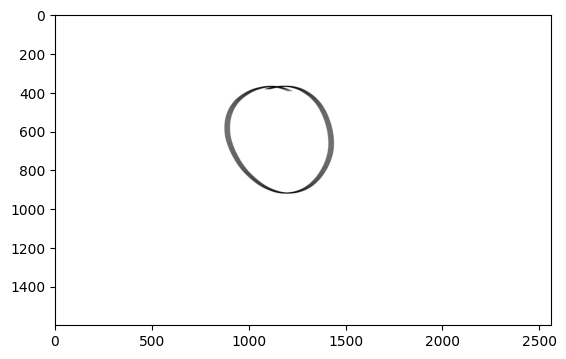

In [5]:
image = imread(train_raw_O_list[0])
image = color.rgb2gray(image[:,:,:3])
plt.imshow(image, cmap='gray')

(28, 28)


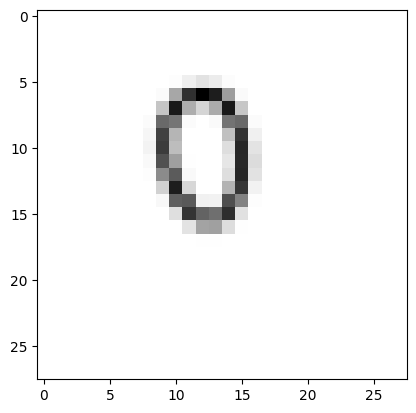

In [6]:
## resize 시키기

img_resized = resize(image, (28,28))
print(img_resized.shape)
plt.imshow(img_resized, cmap='gray')

In [7]:
## 저장하기

import numpy as np

imsave('./data/OX/tmp.png', np.round(img_resized*255).astype(np.uint8))

(28, 28)


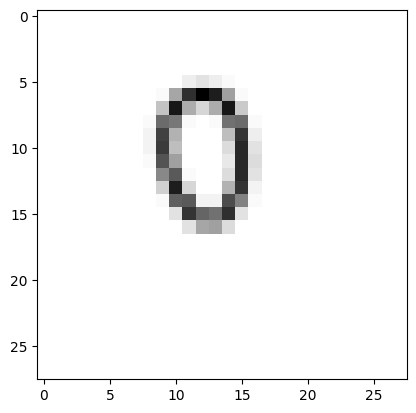

In [8]:
## 다시 확인

tmp = imread('./data/OX/tmp.png')
print(tmp.shape)
plt.imshow(tmp, cmap='gray')

In [9]:
## 파일 이름 추출 연습

train_raw_O_list[1].split('/')[5][:-4]

'IMG_1134'

In [10]:
## 이미지 resize 함수 하나 만들기

def img_resize (img):
    img = color.rgb2gray(img[:,:,:3])
    return resize(img, (28, 28))

In [11]:
# train_O

from tqdm.notebook import tqdm

def convert_train_O():
    train_raw_O_list = glob('./data/OX/train_raw/O/*')
    for each in tqdm(train_raw_O_list):
        img = imread(each)
        img_resized = img_resize(img)
        save_name = './data/OX/train_raw/O/' + each.split('/')[-1][:-4] + '.png'
        imsave(save_name, np.round(img_resized*255).astype(np.uint8))
        
convert_train_O()

  0%|          | 0/167 [00:00<?, ?it/s]

/tmp/ipykernel_8245/322820834.py:11: UserWarning: ./data/OX/train_raw/O/o40.png is a low contrast image
  imsave(save_name, np.round(img_resized*255).astype(np.uint8))
/tmp/ipykernel_8245/322820834.py:11: UserWarning: ./data/OX/train_raw/O/o42.png is a low contrast image
  imsave(save_name, np.round(img_resized*255).astype(np.uint8))
/tmp/ipykernel_8245/322820834.py:11: UserWarning: ./data/OX/train_raw/O/o41.png is a low contrast image
  imsave(save_name, np.round(img_resized*255).astype(np.uint8))


In [12]:
def convert_train_X():
    train_raw_X_list = glob('./data/OX/train_raw/X/*')
    for each in tqdm(train_raw_X_list):
        img = imread(each)
        img_resized = img_resize(img)
        save_name = './data/OX/train_raw/X/' + each.split('/')[-1][:-4] + '.png'
        imsave(save_name, np.round(img_resized*255).astype(np.uint8))
        
convert_train_X()

  0%|          | 0/114 [00:00<?, ?it/s]

In [15]:
def convert_test_O():
    test_raw_O_list = glob('./data/OX/test_raw/O/*')
    for each in tqdm(test_raw_O_list):
        img = imread(each)
        img_resized = img_resize(img)
        save_name = './data/OX/test_raw/O/' + each.split('/')[-1][:-4] + '.png'
        imsave(save_name, np.round(img_resized*255).astype(np.uint8))
        
convert_test_O()

  0%|          | 0/30 [00:00<?, ?it/s]

In [16]:
def convert_test_X():
    test_raw_X_list = glob('./data/OX/test_raw/X/*')
    for each in tqdm(test_raw_X_list):
        img = imread(each)
        img_resized = img_resize(img)
        save_name = './data/OX/test_raw/X/' + each.split('/')[-1][:-4] + '.png'
        imsave(save_name, np.round(img_resized*255).astype(np.uint8))
        
convert_test_X()

  0%|          | 0/30 [00:00<?, ?it/s]

In [27]:
import numpy as np
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras

np.random.seed(13)

In [20]:
tensorflow.keras.__version__

'2.11.0'

In [22]:
# image_ generator

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    './data/OX/train',
                    target_size=(28, 28),
                    batch_size=3,
                    class_mode = 'categorical')
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
                    './data/OX/test',
                    target_size=(28, 28),
                    batch_size=3,
                    class_mode = 'categorical')

Found 281 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [28]:
## 모델 구성

model = models.Sequential([
    layers.Conv2D(32, kernel_size = (3, 3),
                  activation='relu',
                 input_shape=(28, 28, 3)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='sigmoid')
])

2022-11-28 10:43:20.131476: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 10:43:20.166001: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 10:43:20.166851: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 10:43:20.168379: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operati

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                        

In [31]:
## compile

model.compile(loss = 'categorical_crossentropy',
             optimizer='adam', metrics = ['accuracy'])

In [32]:
# fit

hist = model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=50,
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/50


/tmp/ipykernel_8245/363518817.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(
2022-11-28 10:46:08.418675: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8201
2022-11-28 10:46:10.737142: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-11-28 10:46:10.754360: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fd2ac01b290 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-11-28 10:46:10.754377: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2022-11-28 10:46:10.768853: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set e

15/15 [==============================] - 5s 11ms/step - loss: 0.7541 - accuracy: 0.3778 - val_loss: 0.6611 - val_accuracy: 1.0000
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 0.5896 - accuracy: 0.7111 - val_loss: 0.3828 - val_accuracy: 0.9333
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3824 - accuracy: 0.9333 - val_loss: 0.1385 - val_accuracy: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 0.1066 - accuracy: 0.9778 - val_loss: 0.1126 - val_accuracy: 0.9333
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.0940 - accuracy: 0.9556 - val_loss: 0.0447 - val_accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.0798 - accuracy: 0.9778 - val_loss: 0.0189 - val_accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 0.0673 - accuracy: 0.9778 - val_loss: 0.0703 - val_accuracy: 0.9333
Epoch 8/50
15/15 [============

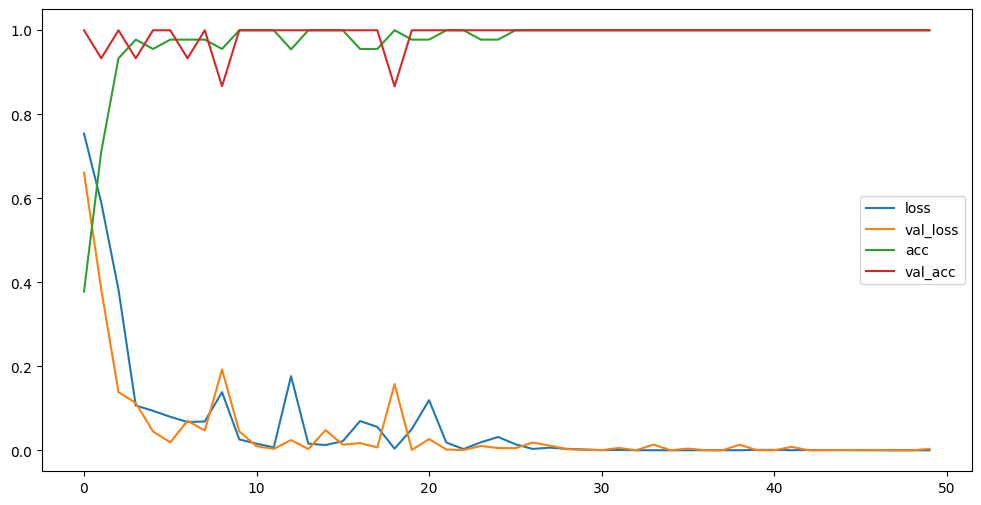

In [34]:
## 학습 상황을 그려보자!!

plt.figure(figsize=(12, 6))
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [35]:
## 테스트 데이터에서 확인

scores = model.evaluate(
        test_generator,
        steps=5)

print('%s: %.2f%%'%(model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 2ms/step - loss: 2.6328e-05 - accuracy: 1.0000
accuracy: 100.00%


In [36]:
## predict 확률은 ?? => 결과가 굉장히 좋음

model.predict(test_generator)

20/20 [==============================] - 0s 1ms/step


array([[9.9999857e-01, 4.3734625e-02],
       [5.1272860e-08, 1.0000000e+00],
       [4.8771848e-11, 1.0000000e+00],
       [4.8520216e-11, 1.0000000e+00],
       [8.0345280e-06, 9.9999583e-01],
       [1.0976606e-02, 9.9881929e-01],
       [9.9901342e-01, 1.8627498e-01],
       [4.0240287e-05, 9.9997294e-01],
       [1.3058215e-04, 9.9994564e-01],
       [9.9980754e-01, 1.3112013e-01],
       [5.8433807e-01, 9.6452266e-01],
       [2.4427666e-07, 9.9999976e-01],
       [3.4401354e-01, 9.8047000e-01],
       [1.2388619e-08, 1.0000000e+00],
       [9.9944514e-01, 1.6580471e-01],
       [9.9806052e-01, 2.1216314e-01],
       [1.3411504e-11, 1.0000000e+00],
       [9.9982041e-01, 1.2994184e-01],
       [4.7701633e-07, 9.9999988e-01],
       [4.3017124e-05, 9.9997389e-01],
       [9.9999833e-01, 4.2384025e-02],
       [2.4511298e-04, 9.9990940e-01],
       [9.9998271e-01, 7.9439379e-02],
       [9.9887460e-01, 1.9068022e-01],
       [9.9988937e-01, 1.1678614e-01],
       [2.1662747e-05, 9.

1/1 [==============================] - 0s 12ms/step


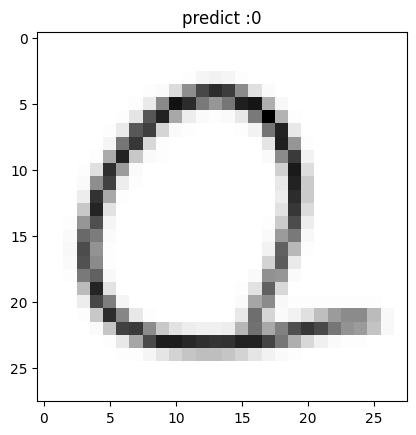

In [43]:
n= 1

def show_prediction_reslut (n):
    img = imread(test_generator.filepaths[n])
    pred = model.predict(np.expand_dims(color.gray2rgb(img), axis = 0))
    title = 'predict :' + str(np.argmax(pred))
    plt.imshow(img/255., cmap='gray')
    plt.title(title)
    plt.show()
    
show_prediction_reslut(n)

1/1 [==============================] - 0s 16ms/step


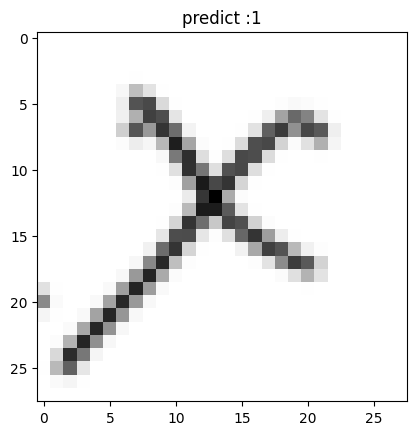

In [44]:
show_prediction_reslut(40)